In [5]:
import pandas as pd
import numpy as np

In [6]:
air_quality = pd.read_csv('../data/processed/air-quality_interpolated.csv')

# Set date as index
air_quality.set_index('date', inplace=True)

In [7]:
air_quality

,station,SO_2,CO,NO,NO_2,PM25,PM10,NOx,O_3,TOL,...,average_temperature,rainfall,minimum_temperature,maximum_temperature,wind_direction,average_wind_speed,maximum_wind_speed,maximum_ultraviolet_index,maximum_pressure,minimum_pressure
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,28079004,17.0,0.8,45.0,58.0,NaN,NaN,127.0,NaN,NaN,...,8.3,4.6,5.7,10.8,23.7,1.4,12.1,0.0,937.9,930.1
2001-01-01,28079008,11.0,1.0,59.0,53.0,NaN,20.0,143.0,21.0,10.2,...,8.2,5.2,5.6,10.7,23.0,2.2,11.7,0.0,937.9,930.1
2001-01-01,28079011,NaN,NaN,46.0,45.0,NaN,NaN,115.0,NaN,NaN,...,8.2,4.9,5.7,10.7,23.3,1.9,11.9,0.0,937.9,930.1
2001-01-01,28079016,NaN,0.6,23.0,47.0,NaN,NaN,82.0,23.0,NaN,...,8.2,5.1,5.5,10.7,23.2,2.2,11.9,0.0,938.4,930.5
2001-01-01,28079017,12.0,NaN,61.0,46.0,NaN,NaN,140.0,23.0,NaN,...,8.7,6.6,6.4,11.1,26.5,4.7,15.5,0.0,942.4,934.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,28079056,NaN,0.3,35.0,40.0,7.0,10.0,94.0,38.0,NaN,...,2.9,0.9,-1.5,7.4,24.5,4.4,12.6,6.4,940.2,930.0
2020-12-31,28079057,2.0,0.4,21.0,40.0,NaN,12.0,72.0,NaN,NaN,...,3.0,1.3,-2.3,8.3,21.5,4.2,13.1,4.2,942.2,931.9
2020-12-31,28079058,NaN,NaN,4.0,11.0,NaN,NaN,16.0,39.0,NaN,...,3.1,1.5,-2.4,8.8,24.4,4.2,12.4,5.7,934.3,924.9


In [8]:
# Set index as datetimeindex
air_quality.index = pd.to_datetime(air_quality.index)

# Show the different stations that exists for each year of data (date as index)
# Group by datetime index year
print(air_quality.groupby(air_quality.index.year).station.nunique())

# Cut 2020 year from dataframe due to COVID-19 pandemic
air_quality = air_quality[air_quality.index < '2020-01-01']

# Print number of rows and columns
print(air_quality.shape)

date
2001    12
2002    12
2003    13
2004    13
2005    13
2006    12
2007    12
2008    12
2009    18
2010    24
2011    24
2012    24
2013    24
2014    24
2015    24
2016    24
2017    24
2018    24
2019    24
2020    24
Name: station, dtype: int64
(126462, 25)


In [9]:
# Order dataframe by station and date
air_quality = air_quality.sort_values(by=['station', 'date'])
print(air_quality.head())

             station  SO_2   CO    NO  NO_2  PM25  PM10    NOx  O_3  TOL  ...  \
date                                                                      ...   
2001-01-01  28079004  17.0  0.8  45.0  58.0   NaN   NaN  127.0  NaN  NaN  ...   
2001-01-02  28079004  15.0  0.5  12.0  60.0   NaN   NaN   78.0  NaN  NaN  ...   
2001-01-03  28079004  15.0  0.6  32.0  65.0   NaN   NaN  114.0  NaN  NaN  ...   
2001-01-04  28079004  15.0  0.5  29.0  63.0   NaN   NaN  108.0  NaN  NaN  ...   
2001-01-05  28079004  16.0  1.0  91.0  57.0   NaN   NaN  197.0  NaN  NaN  ...   

            average_temperature  rainfall  minimum_temperature  \
date                                                             
2001-01-01                  8.3       4.6                  5.7   
2001-01-02                  8.9       0.1                  6.4   
2001-01-03                  7.3       2.4                  5.1   
2001-01-04                  9.8       1.9                  7.8   
2001-01-05                 10.7     

In [10]:
# Use last 4 years of data for testing (20%) and all the prior years for training (80%)
# Split dataframe into train and test
train = air_quality[air_quality.index < '2016-01-01'] # 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015
test = air_quality[air_quality.index >= '2016-01-01'] # 2016, 2017, 2018, 2019

print(test.head())

             station  SO_2   CO    NO  NO_2  PM25  PM10   NOx  O_3  TOL  ...  \
date                                                                     ...   
2016-01-01  28079004   8.0  0.4  28.0  40.0   NaN   NaN  83.0  NaN  NaN  ...   
2016-01-02  28079004   7.0  0.3  21.0  28.0   NaN   NaN  60.0  NaN  NaN  ...   
2016-01-03  28079004   6.0  0.3  14.0  31.0   NaN   NaN  52.0  NaN  NaN  ...   
2016-01-04  28079004   6.0  0.2   8.0  20.0   NaN   NaN  32.0  NaN  NaN  ...   
2016-01-05  28079004   7.0  0.3  10.0  28.0   NaN   NaN  43.0  NaN  NaN  ...   

            average_temperature  rainfall  minimum_temperature  \
date                                                             
2016-01-01                 10.5       2.1                  7.6   
2016-01-02                  7.9       0.0                  3.9   
2016-01-03                  7.9       0.1                  4.1   
2016-01-04                  9.6       2.6                  6.2   
2016-01-05                  6.4       0.0  

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Standardize the data on all columns except the first one (station)
# Note: We are fitting the scaler on the training data only and then transforming both the training and test data
scaler = MinMaxScaler().fit(train.iloc[:, 1:])
train_scaled = scaler.transform(train.iloc[:, 1:])
test_scaled = scaler.transform(test.iloc[:, 1:])

# One hot encode the station column, this time fit on both train and test data, but keep also the original station column
encoder = OneHotEncoder(sparse=False)
encoder.fit(np.concatenate((train.iloc[:, 0].values.reshape(-1, 1), test.iloc[:, 0].values.reshape(-1, 1)), axis=0))
train_encoded = encoder.transform(train.iloc[:, 0].values.reshape(-1, 1))
test_encoded = encoder.transform(test.iloc[:, 0].values.reshape(-1, 1))

# Concatenate the scaled and encoded data
train_data = np.concatenate((train_encoded, train_scaled), axis=1)
test_data = np.concatenate((test_encoded, test_scaled), axis=1)

# Re-add the column names
train_data = pd.DataFrame(train_data, columns=['station_' + str(i) for i in range(train_encoded.shape[1])] + [air_quality.columns[i] for i in range(1, train.shape[1])])
test_data = pd.DataFrame(test_data, columns=['station_' + str(i) for i in range(test_encoded.shape[1])] + [air_quality.columns[i] for i in range(1, test.shape[1])])

# Add the station column back to the dataframe
train_data['station'] = train.reset_index()['station']
test_data['station'] = test.reset_index()['station']

# Re-order the columns with the station column first
train_data = train_data[['station'] + [col for col in train_data.columns if col != 'station']]
test_data = test_data[['station'] + [col for col in test_data.columns if col != 'station']]

# Set nan values to -1
train_data.fillna(-1, inplace=True)
test_data.fillna(-1, inplace=True)

pd.set_option('float_format', '{:f}'.format)
pd.set_option('display.max_columns', None)
train_data.describe(include='all')

,station,station_0,station_1,station_2,station_3,station_4,station_5,station_6,station_7,station_8,station_9,station_10,station_11,station_12,station_13,station_14,station_15,station_16,station_17,station_18,station_19,station_20,station_21,station_22,station_23,SO_2,CO,NO,NO_2,PM25,PM10,NOx,O_3,TOL,BEN,EBE,TCH,CH4,NMHC,average_temperature,rainfall,minimum_temperature,maximum_temperature,wind_direction,average_wind_speed,maximum_wind_speed,maximum_ultraviolet_index,maximum_pressure,minimum_pressure
count,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000,91583.000000
mean,28079032.012437,0.059553,0.053755,0.059498,0.059574,0.042541,0.058810,0.058854,0.051756,0.059018,0.059531,0.059520,0.058166,0.059345,0.024044,0.022177,0.023880,0.022963,0.024109,0.023694,0.023410,0.024175,0.024240,0.023989,0.023400,-0.416940,-0.440082,0.052574,0.237190,-0.796207,-0.458327,0.086301,-0.277213,-0.790965,-0.796199,-0.791357,-0.772482,-0.751328,-0.812082,0.508035,0.017437,0.553467,0.502340,0.222608,0.183979,0.298382,0.541662,0.496273,0.543417
std,16.912211,0.236657,0.225534,0.236556,0.236698,0.201820,0.235270,0.235352,0.221536,0.235659,0.236617,0.236596,0.234058,0.236271,0.153186,0.147258,0.152676,0.149786,0.153389,0.152096,0.151204,0.153592,0.153795,0.153016,0.151170,0.546729,0.545955,0.085951,0.133436,0.425705,0.564091,0.092559,0.655491,0.425293,0.413758,0.426767,0.504101,0.550528,0.416972,0.217109,0.056489,0.188368,0.216984,0.200903,0.109894,0.129558,0.283061,0.104502,0.098359
min,28079004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28079017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.012238,0.146739,-1.000000,-1.000000,0.036929,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.321127,0.000000,0.402778,0.313253,0.081633,0.111111,0.206767,0.335616,0.433172,0.490251
50%,28079035.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010989,0.038462,0.027972,0.222826,-1.000000,-1.000000,0.063168,0.081633,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.484507,0.000000,0.541667,0.479518,0.217347,0.162393,0.289474,0.602740,0.489533,0.541783
75%,28079047.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.076923,0.076923,0.064685,0.315217,-1.000000,0.099448,0.110787,0.319728,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.698592,0.000000,0.711111,0.696386,0.262245,0.239316,0.375940,0.767123,0.557166,0.601671
max,28079060.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0

In [12]:
print(train_data.shape, test_data.shape)

(91583, 49) (34879, 49)


In [13]:
# get column indexes for PM25, PM10, NO_2, SO_2, O_3
pm25_idx = train_data.columns.get_loc('PM25')
pm10_idx = train_data.columns.get_loc('PM10')
no2_idx = train_data.columns.get_loc('NO_2')
so2_idx = train_data.columns.get_loc('SO_2')
o3_idx = train_data.columns.get_loc('O_3')

print(pm25_idx, pm10_idx, no2_idx, so2_idx, o3_idx)

29 30 28 25 32


In [14]:
# Prepare data for LSTM model, 14 day lookback window and 1 day forecast.
def prepare_data(data, lookback, forecast):
    X, Y = [], []
    for i in range(len(data) - lookback - forecast):
        # Delete the station column
        X.append(data.iloc[i:i + lookback, 1:])
        # Target is the next day for PM25, PM10, NO_2, SO_2, O_3
        Y.append(data.iloc[i + lookback:i + lookback + forecast, [pm25_idx, pm10_idx, no2_idx, so2_idx, o3_idx]])
    return np.array(X), np.array(Y)

train_X, train_Y = [], []
test_X, test_Y = [], []

# For each station, prepare data for LSTM model
for station in train_data.station.unique():
    data = train_data[train_data.station == station]
    train_X.append(prepare_data(data, 14, 1)[0])
    train_Y.append(prepare_data(data, 14, 1)[1])

for station in test_data.station.unique():
    data = test_data[test_data.station == station]
    test_X.append(prepare_data(data, 14, 1)[0])
    test_Y.append(prepare_data(data, 14, 1)[1])

# Convert to numpy arrays
train_X, train_Y = np.array(train_X), np.array(train_Y)
test_X, test_Y = np.array(test_X), np.array(test_Y)

# Combine all stations into one array
train_X, train_Y = np.concatenate(train_X), np.concatenate(train_Y)
test_X, test_Y = np.concatenate(test_X), np.concatenate(test_Y)

print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)
print(train_X)

/tmp/ipykernel_365/177187834.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train_X, train_Y = np.array(train_X), np.array(train_Y)
/tmp/ipykernel_365/177187834.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test_X, test_Y = np.array(test_X), np.array(test_Y)


(91223, 14, 48) (91223, 1, 5)
(34519, 14, 48) (34519, 1, 5)


In [15]:
# Save numpy arrays to disk
np.save('train_X.npy', train_X)
np.save('train_Y.npy', train_Y)
np.save('test_X.npy', test_X)
np.save('test_Y.npy', test_Y)

Epoch 1/500
2851/2851 - 62s - loss: 0.3282 - val_loss: 0.2900 - 62s/epoch - 22ms/step
Epoch 2/500
2851/2851 - 68s - loss: 0.2371 - val_loss: 0.2503 - 68s/epoch - 24ms/step
Epoch 3/500
2851/2851 - 65s - loss: 0.2019 - val_loss: 0.2317 - 65s/epoch - 23ms/step
Epoch 4/500
2851/2851 - 59s - loss: 0.1850 - val_loss: 0.1994 - 59s/epoch - 21ms/step
Epoch 5/500
2851/2851 - 62s - loss: 0.1754 - val_loss: 0.2043 - 62s/epoch - 22ms/step
Epoch 6/500
2851/2851 - 64s - loss: 0.1710 - val_loss: 0.1850 - 64s/epoch - 23ms/step
Epoch 7/500
2851/2851 - 65s - loss: 0.1665 - val_loss: 0.1713 - 65s/epoch - 23ms/step
Epoch 8/500
2851/2851 - 64s - loss: 0.1624 - val_loss: 0.1698 - 64s/epoch - 23ms/step
Epoch 9/500
2851/2851 - 61s - loss: 0.1605 - val_loss: 0.1610 - 61s/epoch - 21ms/step
Epoch 10/500
2851/2851 - 59s - loss: 0.1590 - val_loss: 0.1563 - 59s/epoch - 21ms/step
Epoch 11/500
2851/2851 - 60s - loss: 0.1455 - val_loss: 0.1551 - 60s/epoch - 21ms/step
Epoch 12/500
2851/2851 - 65s - loss: 0.1278 - val_lo

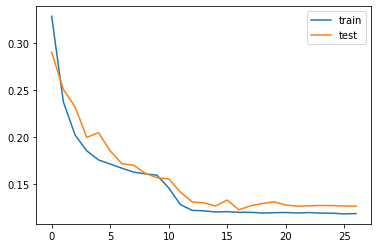

In [39]:
import mlflow
from keras.models import Sequential
from keras.layers import InputLayer, Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from keras.losses import mean_absolute_error
import keras.utils

mlflow.set_experiment("LSTM_all_stations")
mlflow.start_run()
mlflow.tensorflow.autolog()

# Define a seed for reproducibility
keras.utils.set_random_seed(42)

# LSTM model to predict air quality data for a 14 day lookback window and 1 day forecast using the train and test data.
model = Sequential()
model.add(InputLayer(input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(LSTM(units=50, activation='tanh', return_sequences=True)) # We avoid using activation='relu' because it disregards the negative values and this may result in information loss.
# model.add(Dropout(0.2))
model.add(LSTM(units=50, activation='tanh', return_sequences=False)) # return_sequences=False for single output prediction (i.e. 1 day forecast)
# model.add(Dropout(0.2))
model.add(Dense(units=train_Y.shape[2]))
model.compile(loss=scaled_mae, optimizer='adam')

# Train the model with early stopping.
history = model.fit(train_X, train_Y, epochs=500, batch_size=32, validation_data=(test_X, test_Y), verbose=2, shuffle=False, callbacks=[EarlyStopping(monitor='val_loss', patience=10, min_delta=0.0001, restore_best_weights=True)])

# Plot the model's predictions
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.savefig("LSTM_loss.png")

# log and fetch the artifact
mlflow.log_artifact("LSTM_loss.png")

mlflow.end_run()

plt.show()
plt.close()

In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 5)                 1080      
                                                                 
 dropout_4 (Dropout)         (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
Total params: 1,110
Trainable params: 1,110
Non-trainable params: 0
_________________________________________________________________


In [41]:
import datetime
# Save model with current date and time as a unique identifier, with best weights
model.save('LSTM_all_stations_' + str(datetime.datetime.now()).replace(' ', '_').replace(':', '-').replace('.', '_') + '.h5')

In [16]:
# Import keras to load the model
from keras.models import load_model
import numpy as np

# Load keras model from file
model = load_model('google_LSTM_all_stations_2022-05-31_21-43-25_519495.h5')

# Load numpy arrays of training and test data
train_X = np.load('train_X.npy')
train_Y = np.load('train_Y.npy')
test_X = np.load('test_X.npy')
test_Y = np.load('test_Y.npy')

2022-06-01 00:49:43.938506: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-01 00:49:43.938882: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-01 00:49:51.117196: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-01 00:49:51.117416: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-01 00:49:51.117461: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-2S0FQ4N): /proc/driver/nvidia/version does not exist
2022-06-01 00:49:51.117959: I tensorflow/core/platform/cpu_fe

In [17]:
scaler.feature_names_in_

array(['SO_2', 'CO', 'NO', 'NO_2', 'PM25', 'PM10', 'NOx', 'O_3', 'TOL',
       'BEN', 'EBE', 'TCH', 'CH4', 'NMHC', 'average_temperature',
       'rainfall', 'minimum_temperature', 'maximum_temperature',
       'wind_direction', 'average_wind_speed', 'maximum_wind_speed',
       'maximum_ultraviolet_index', 'maximum_pressure',
       'minimum_pressure'], dtype=object)

In [18]:
# Predict air quality for the test data and inverse transform the data
predictions = model.predict(test_X)

print(predictions.shape)

# Turn the predictions into dataframe with the column names
# predictions = pd.DataFrame(predictions, columns=['PM25', 'PM10', 'NO_2', 'SO_2', 'O_3'])
print(predictions)

1079/1079 [==============================] - 46s 40ms/step
(34519, 5)
[[-0.99596006 -0.8541397   0.23444217  0.03427416 -0.8979901 ]
 [-0.99611175 -0.8538841   0.23209532  0.02935606 -0.89708006]
 [-0.99605006 -0.85583454  0.236461    0.03137958 -0.9004736 ]
 ...
 [-0.99252695  0.06003934  0.24223416 -0.9924201   0.17401287]
 [-0.99238044  0.05917531  0.2534259  -0.9917565   0.1566242 ]
 [-0.9922338   0.05169326  0.25600752 -0.99423623  0.15351635]]


In [19]:
# Turn the predictions into dataframe with the column names
predictions = pd.DataFrame(predictions, columns=['PM25', 'PM10', 'NO_2', 'SO_2', 'O_3'])

# Create a dummy DataFrame with scaler.feature_names_in_ as the column names in order to inverse transform the data
inverse_transform = pd.DataFrame(columns=scaler.feature_names_in_)

# Join the predictions and inverse_transform dataframes on 'PM25', 'PM10', 'NO_2', 'SO_2', 'O_3'
inverse_transform['PM25'] = predictions['PM25']
inverse_transform['PM10'] = predictions['PM10']
inverse_transform['NO_2'] = predictions['NO_2']
inverse_transform['SO_2'] = predictions['SO_2']
inverse_transform['O_3'] = predictions['O_3']

# Round negative values and leave the rest of the values as they are
inverse_transform = inverse_transform.applymap(lambda x: round(x, 0) if x < 0 else x)

# Count how many values are negative
print(inverse_transform[inverse_transform < 0].count())

# Replace -1 values with nan
inverse_transform = inverse_transform.replace(-1, np.nan)

inverse_transform = scaler.inverse_transform(inverse_transform)
inverse_transform = inverse_transform.round(2)

# Turn the inverse_transform into a dataframe with the column names
inverse_transform = pd.DataFrame(inverse_transform, columns=scaler.feature_names_in_)

# Drop all columns except PM25, PM10, NO_2, SO_2, O_3
predictions_df = inverse_transform[['PM25', 'PM10', 'NO_2', 'SO_2', 'O_3']]

predictions_df

SO_2                         20187
CO                               0
NO                               0
NO_2                             0
PM25                         25739
PM10                         16963
NOx                              0
O_3                          14404
TOL                              0
BEN                              0
EBE                              0
TCH                              0
CH4                              0
NMHC                             0
average_temperature              0
rainfall                         0
minimum_temperature              0
maximum_temperature              0
wind_direction                   0
average_wind_speed               0
maximum_wind_speed               0
maximum_ultraviolet_index        0
maximum_pressure                 0
minimum_pressure                 0
dtype: int64


,PM25,PM10,NO_2,SO_2,O_3
0,NaN,NaN,44.140000,4.120000,NaN
1,NaN,NaN,43.710000,3.670000,NaN
2,NaN,NaN,44.510000,3.860000,NaN
3,NaN,NaN,45.720000,4.660000,NaN
4,NaN,NaN,45.150000,4.020000,NaN
...,...,...,...,...,...
34514,NaN,14.830000,42.320000,NaN,30.870000
34515,NaN,14.490000,43.840000,NaN,28.580000
34516,NaN,13.870000,45.570000,NaN,26.580000
34517,NaN,13.710000,47.630000,NaN,24.020000


In [20]:
# Reduce the dimension of the test_Y numpy array
test_Y_df = test_Y.reshape(test_Y.shape[0], test_Y.shape[2])

# Turn the test into dataframe with the column names
test_Y_df = pd.DataFrame(test_Y_df, columns=['PM25', 'PM10', 'NO_2', 'SO_2', 'O_3'])

# If values = -1, set them to nan
test_Y_df = test_Y_df.replace(-1, np.nan)

# Create a dummy DataFrame with scaler.feature_names_in_ as the column names in order to inverse transform the data
inverse_transform_test = pd.DataFrame(columns=scaler.feature_names_in_)

# Join the test and inverse_transform dataframes on 'PM25', 'PM10', 'NO_2', 'SO_2', 'O_3'
inverse_transform_test['PM25'] = test_Y_df['PM25']
inverse_transform_test['PM10'] = test_Y_df['PM10']
inverse_transform_test['NO_2'] = test_Y_df['NO_2']
inverse_transform_test['SO_2'] = test_Y_df['SO_2']
inverse_transform_test['O_3'] = test_Y_df['O_3']

inverse_transform_test = scaler.inverse_transform(inverse_transform_test)

# Turn the inverse_transform into a dataframe with the column names
inverse_transform_test = pd.DataFrame(inverse_transform_test, columns=scaler.feature_names_in_)

# Drop all columns except PM25, PM10, NO_2, SO_2, O_3
test_Y_df = inverse_transform_test[['PM25', 'PM10', 'NO_2', 'SO_2', 'O_3']]

test_Y_df

,PM25,PM10,NO_2,SO_2,O_3
0,NaN,NaN,40.000000,8.000000,NaN
1,NaN,NaN,51.000000,9.000000,NaN
2,NaN,NaN,52.000000,9.000000,NaN
3,NaN,NaN,41.000000,8.000000,NaN
4,NaN,NaN,66.000000,11.000000,NaN
...,...,...,...,...,...
34514,NaN,15.000000,55.000000,NaN,10.000000
34515,NaN,12.000000,63.000000,NaN,17.000000
34516,NaN,14.000000,76.000000,NaN,13.000000
34517,NaN,15.000000,69.000000,NaN,14.000000


Mean absolute error:
 PM25    9.061329
PM10    8.485910
NO_2   13.740051
SO_2    5.983295
O_3    21.171560
dtype: float64
Mean absolute error:
 11.688429137311559


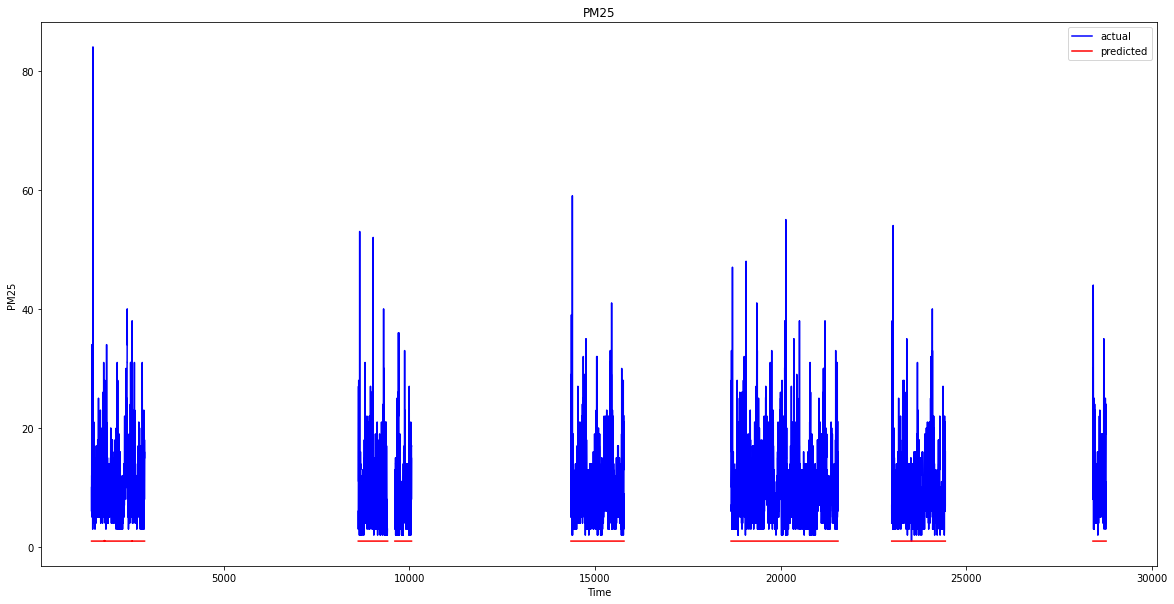

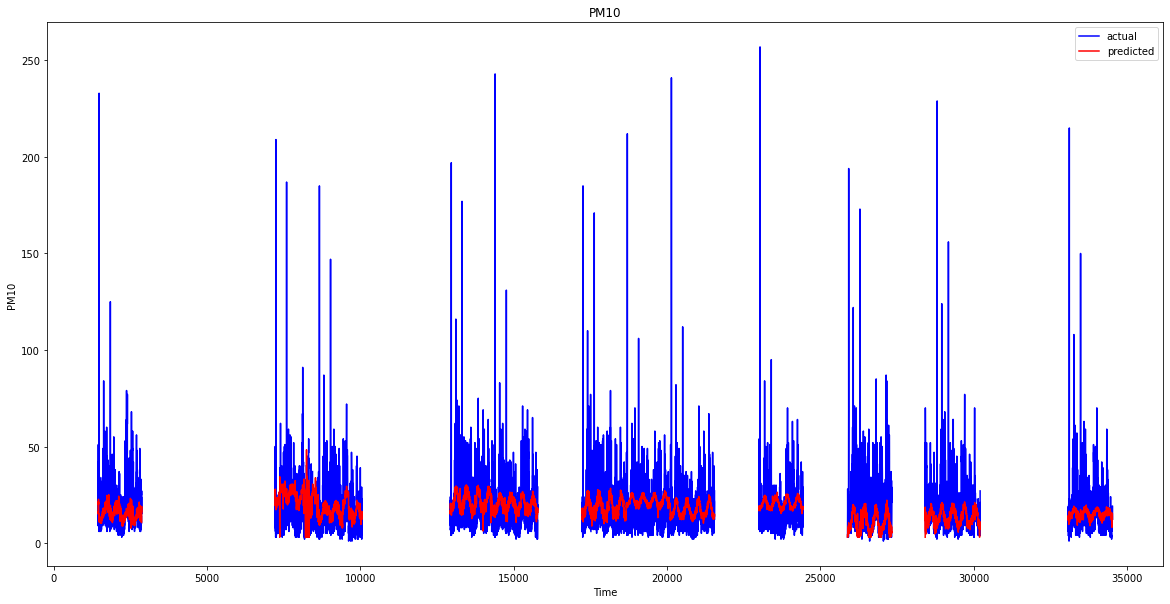

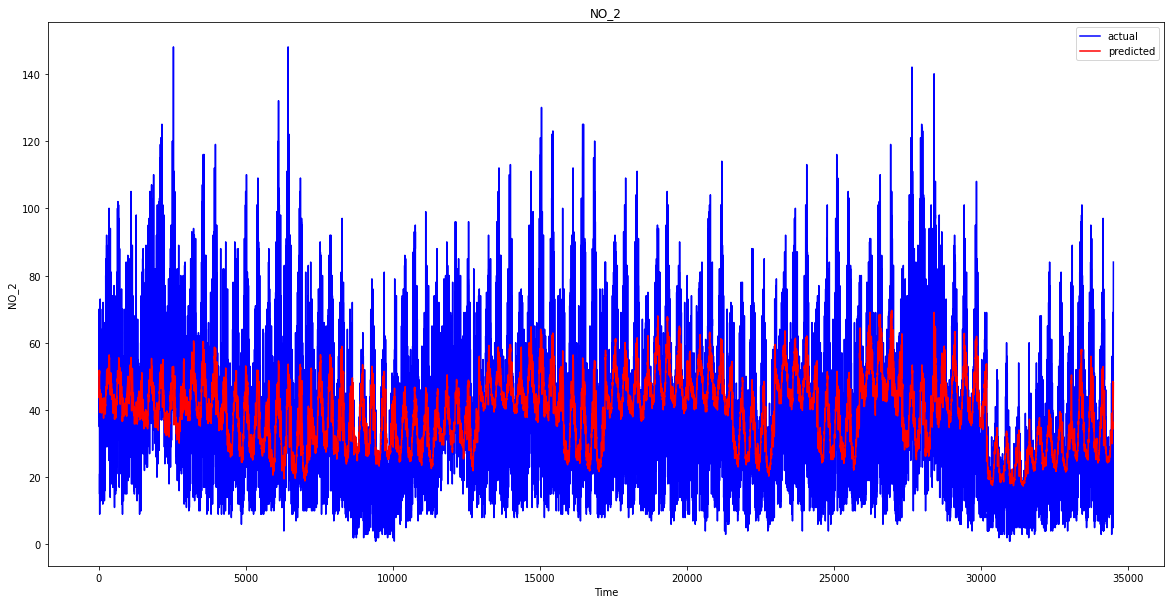

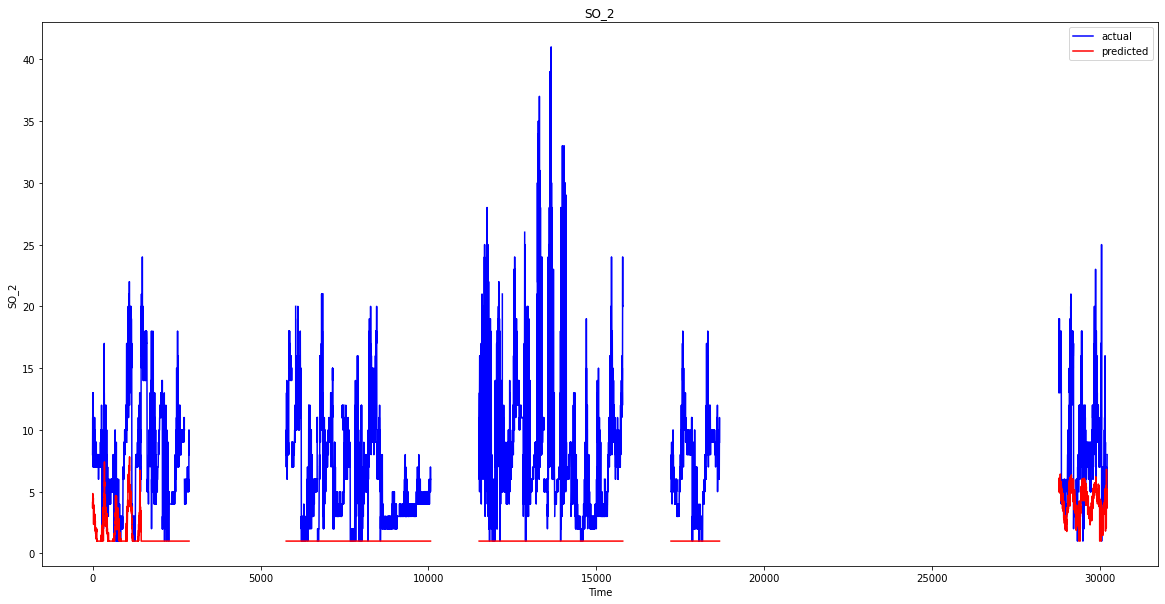

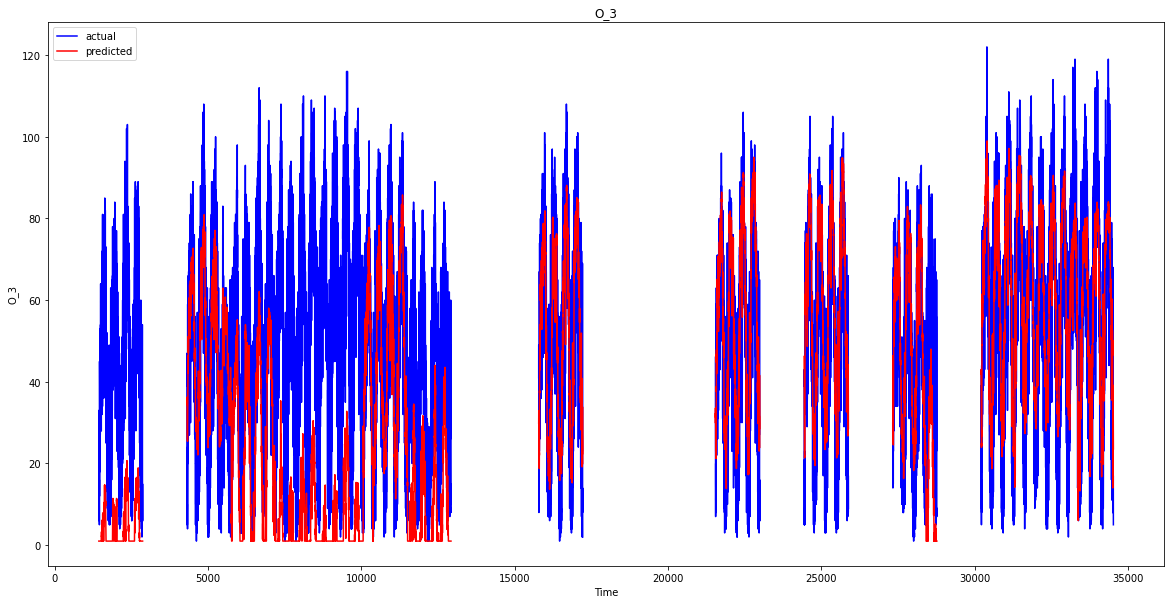

In [26]:
import matplotlib.pyplot as plt

# Calculate the mean absolute error
mae = np.mean(np.abs(predictions_df - test_Y_df))

print("Mean absolute error:\n", mae)

print("Mean absolute error:\n", np.mean(mae))

# Plot the predicted and actual air quality data for the test data for each contaminant.
# The predicted data is in red, the actual data is in blue.
# Make the figure bigger to see all the data points.
for column in predictions_df.columns:
    plt.figure(figsize=(20,10))
    plt.plot(test_Y_df[column], color='blue', label='actual')
    plt.plot(predictions_df[column], color='red', label='predicted')
    plt.title(column)
    plt.xlabel('Time')
    plt.ylabel(column)
    plt.legend()
    plt.show()
    plt.close()

In [38]:
mlflow.end_run()